In [63]:
#Trigger-Setting ofdmfft|source_sop either edge
import numpy as np  
import matplotlib.pyplot as plt
from signaldump import signaltapCsvDumper
import seaborn
plt.rcParams['figure.figsize']=[10,10]
import csv
import CommonScript as cs
import matplotlib.animation as animation
from bitstring import BitArray

0xbe9b65be87e4cda361d4172b009a1500


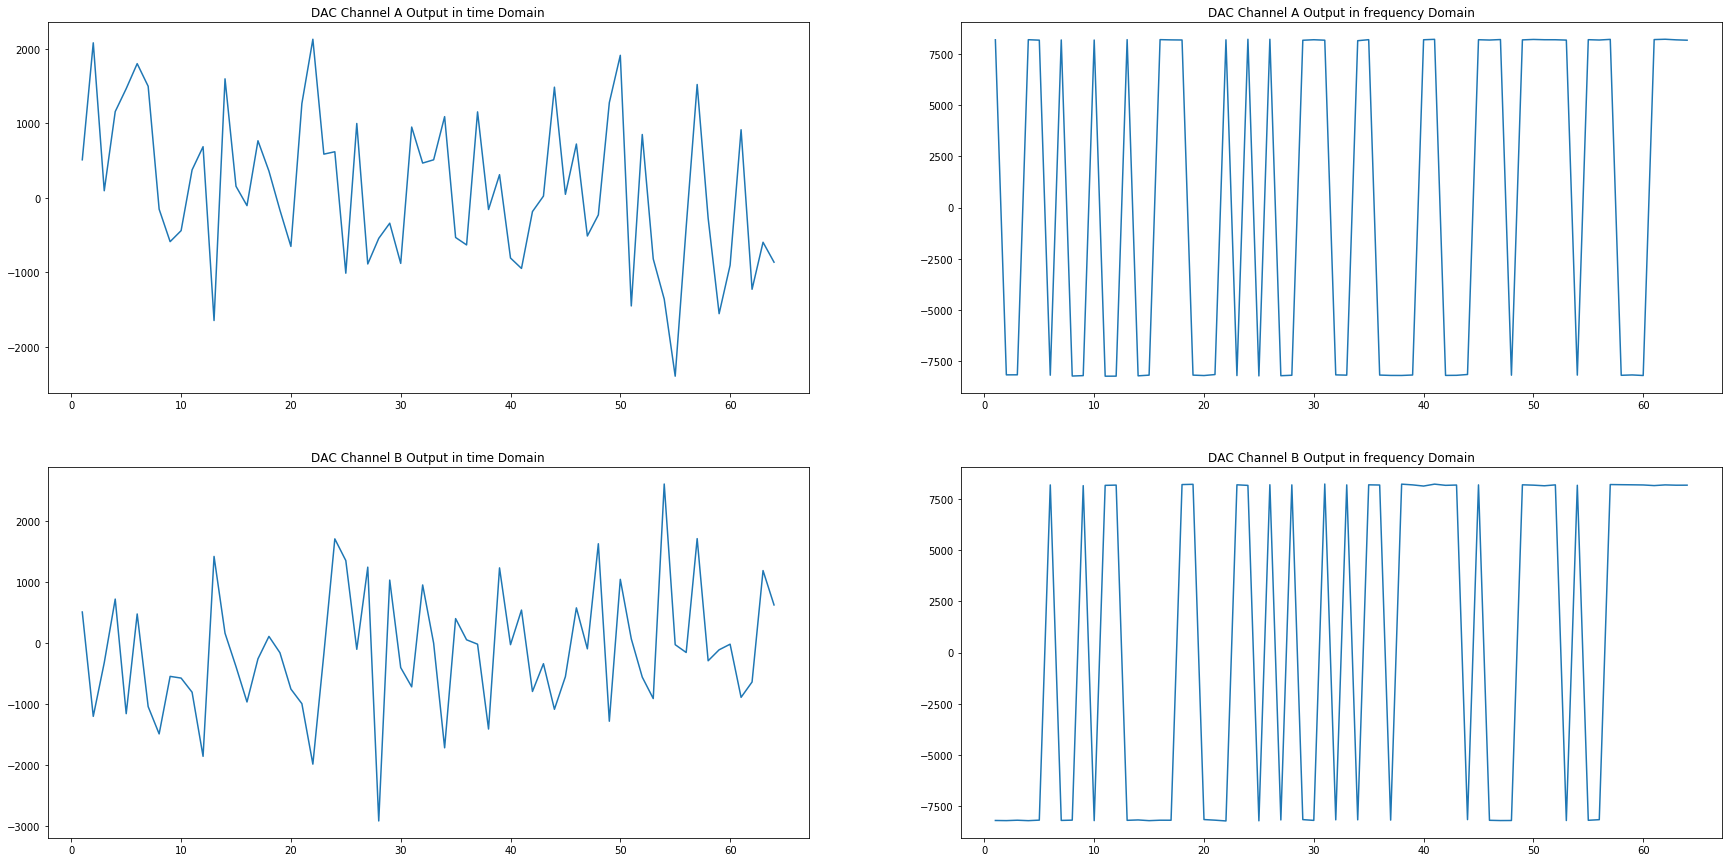

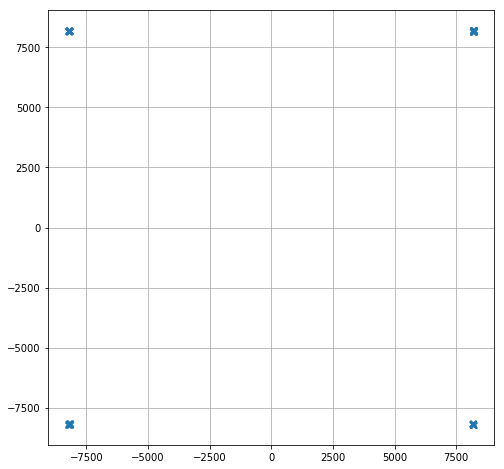

In [69]:
dumper=signaltapCsvDumper('../stp1.csv')
dumper.dumpSession(signalPattern=["DA\[(\d+)\]","DB\[(\d+)\]"],condition="active-high",validPattern=["ofdmdaccontrol|asi_in0_valid"],outputName="TransiverDAOutput",unsigned=True)
with open('./TransiverDAOutput.csv','r') as fp:
    csvBuffer=list(csv.reader(fp))
    lengthVector=np.linspace(1,64,64)
    plt.figure(figsize=(30,15))
    plt.subplot(221)
    real = np.array(csvBuffer[0],dtype=int)[::20]-8192
    imag = np.array(csvBuffer[1],dtype=int)[::20]-8192
    outSignal = real + imag*1j
    frequencyDomain=np.fft.fft(outSignal)
    plt.plot(lengthVector,real,'-')
    plt.title('DAC Channel A Output in time Domain')
    plt.subplot(222)
    plt.title('DAC Channel A Output in frequency Domain')
    plt.plot(lengthVector,np.real(frequencyDomain),'-')
    plt.subplot(223)
    plt.plot(lengthVector,imag,'-')
    plt.title('DAC Channel B Output in time Domain')
    plt.subplot(224)
    plt.plot(lengthVector,np.imag(frequencyDomain),'-')

    plt.title('DAC Channel B Output in frequency Domain')

fftResult  = frequencyDomain
demodReal=np.real(fftResult)
demodImag=np.imag(fftResult)

plt.figure(figsize=(8,8))
plt.grid(True,axis='both',which='major')
plt.scatter(demodReal,demodImag,marker='x')

demodOut = cs.ConstellationDeMapping(demodReal,demodImag)

print(hex(int(demodOut,2)))
sendData = int(demodOut,2)


[  537  1769   180  1022  1250  1503  1245   -60  -399  -280   371   614
 -1228  1343   184   -18   671   338   -72  -451  1068  1734   494   520
  -768   832  -672  -378  -223  -643   807   417   452   905  -386  -451
   964   -87   285  -593  -692   -83    77  1227    80   617  -362  -131
  1058  1545 -1122   712  -610 -1021 -1824  -226  1276  -152 -1158  -625
   814  -886  -372  -575]
[  488  -864  -157   669  -822   477  -725 -1068  -301  -323  -511 -1328
  1263   251  -179  -632   -60   229    11  -456  -634 -1406    32  1516
  1211    56  1116 -2165   976  -172  -410   907   146 -1207   474   194
   135  -955  1134   129   576  -485  -111  -695  -264   626    88  1443
  -868   982   206  -290  -562  2215   117    14  1487  -107    39   113
  -571  -363  1071   617]
0x3e9b65be87e4cda361d4172b009a1500
45.23809523809524


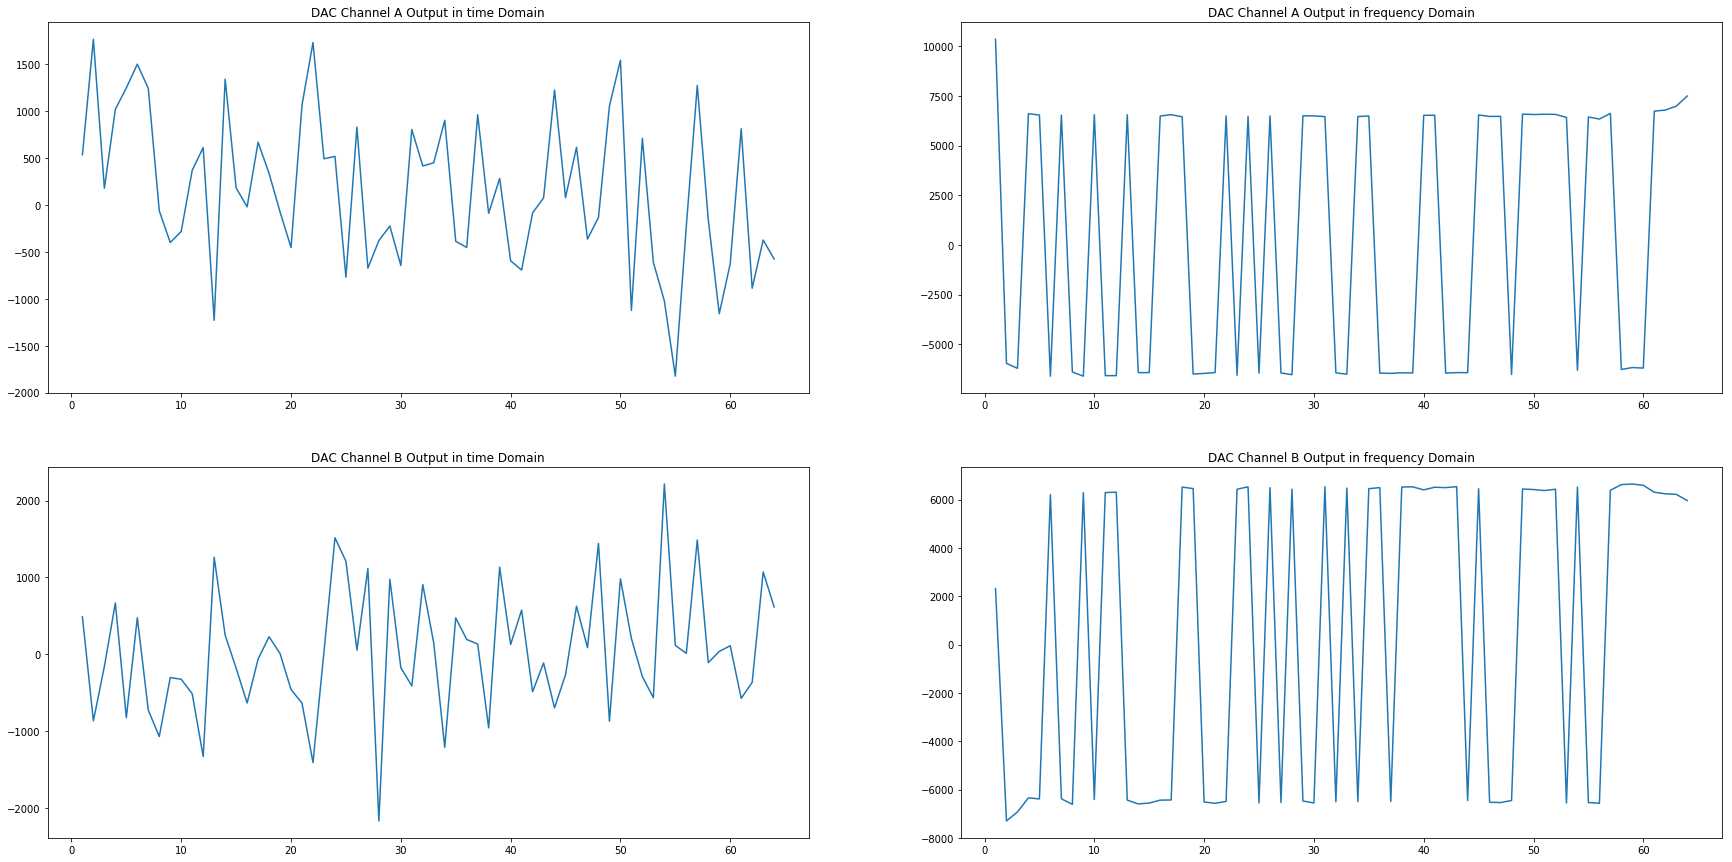

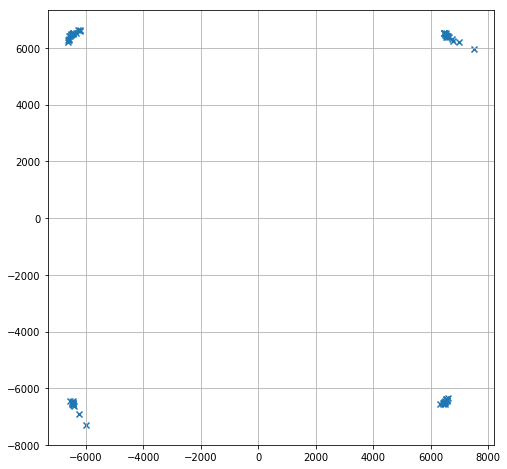

In [70]:
def symbolSync(series):
    accu_flag=0
    ma1=0
    ma2=0
    ma1_accu=0
    ma2_accu=0
    v2=0
    v1=0
    th=100
    for v,i in enumerate(real):
        ma1_accu=ma1_accu+i
        ma2_accu=ma2_accu+i
        if(v2==3):
            ma2=ma2_accu//4
#             print(ma2,ma2-ma1)
            if(accu_flag):
                if(abs(ma1-ma2)>th):
                    return v+8
            v2=0
            ma2_accu=0
        else:
            v2=v2+1
        if(v1==31):
            accu_flag=1
            ma1=ma1_accu//32
            v1=0
            ma1_accu=0
        else:
            v1=v1+1
   
dumper.dumpSession(signalPattern=["ADA_D\[(\d+)\]","ADB_D\[(\d+)\]"],condition="range",inf=0,sup=4000,outputName="ReceiverADInput")

with open('./ReceiverADInput.csv','r') as fp:
    csvBuffer=list(csv.reader(fp))
    real = np.negative(np.array(csvBuffer[0],dtype=int))
    imag = np.negative(np.array(csvBuffer[1],dtype=int))
    reagIndex=symbolSync(real)
    imagIndex=symbolSync(imag)
    real = real[reagIndex:reagIndex+1279:20]
    imag = imag[imagIndex:imagIndex+1279:20]
    print(real)
    print(imag)
    outSignal = real + imag*1j
    frequencyDomain=np.fft.fft(outSignal)
    lengthVector=np.linspace(1,64,64)
    plt.figure(figsize=(30,15))
    plt.subplot(221)
    plt.plot(lengthVector,real,'-')
    plt.title('DAC Channel A Output in time Domain')
    plt.subplot(222)
    plt.title('DAC Channel A Output in frequency Domain')
    plt.plot(lengthVector,np.real(frequencyDomain),'-')
    plt.subplot(223)
    plt.plot(lengthVector,imag,'-')
    plt.title('DAC Channel B Output in time Domain')
    plt.subplot(224)
    plt.plot(lengthVector,np.imag(frequencyDomain),'-')

    plt.title('DAC Channel B Output in frequency Domain')

    fftResult  = frequencyDomain
    demodReal=np.real(fftResult)
    demodImag=np.imag(fftResult)

    plt.figure(figsize=(8,8))
    plt.grid(True,axis='both',which='major')
    plt.scatter(demodReal[1:],demodImag[1:],marker='x')

    demodOut = cs.ConstellationDeMapping(demodReal,demodImag)
    #Calculate BER
    receiveData=int(demodOut,2)
    sendLiteral=np.binary_repr(sendData)
    receiveLiteral =np.binary_repr(receiveData)
    BER=100.0*len([(i,j) for i,j in zip(sendLiteral[8:],receiveLiteral[8:]) if i!=j])/len(receiveLiteral)

    print(hex(int(demodOut,2)))
    print(BER)



            
        
        
    



128
[  113  1775   178  1018  1258  1506  1250   -64  -406  -279   372   617
 -1243  1348   181   -17   676   343   -75  -449  1069  1737   495   524
  -770   840  -670  -380  -219  -642   816   416   453   906  -390  -448
   967   -86   283  -597  -698   -88    80  1235    82   617  -359  -133
  1065  1554 -1128   718  -612 -1030 -1833  -226  1289  -154 -1164  -628
   817  -891  -374  -580]
[  121  -862  -153   672  -821   480  -726 -1070  -315  -326  -508 -1333
  1272   255  -171  -632   -60   231    15  -455  -639 -1408    30  1518
  1216    55  1127 -2176   977  -168  -419   911   139 -1213   477   196
   134  -962  1139   130   578  -482  -113  -702  -269   629    88  1448
  -869   980   204  -289  -569  2222   118    13  1490  -105    45   117
  -577  -366  1076   618]
0x3e9b65be87e4cda361d4172b009a1500
45.23809523809524


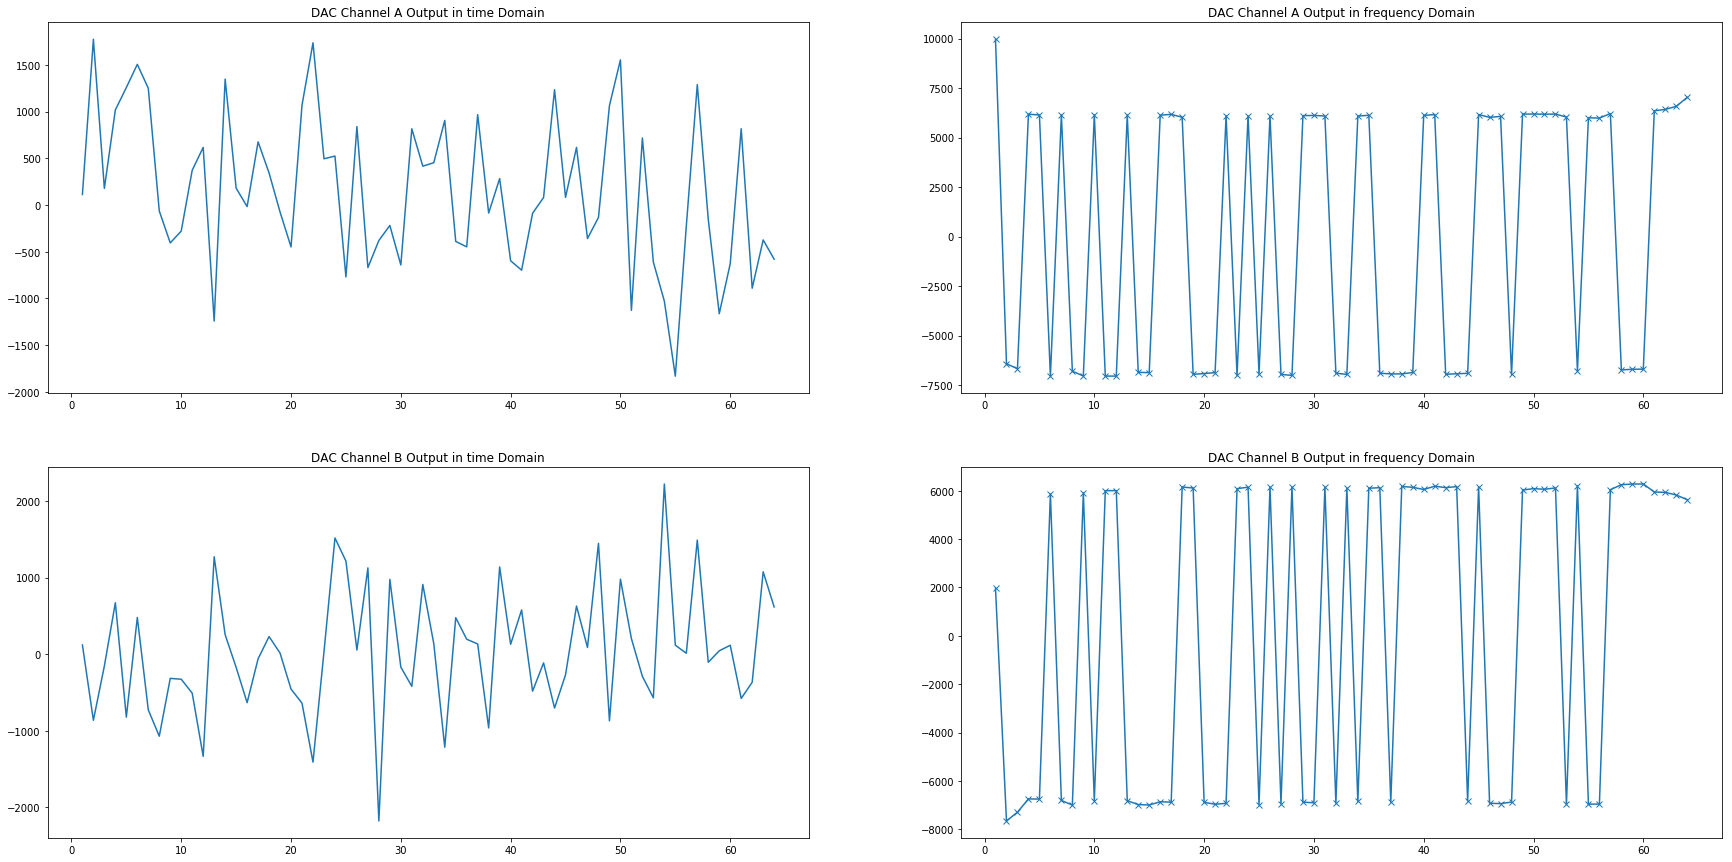

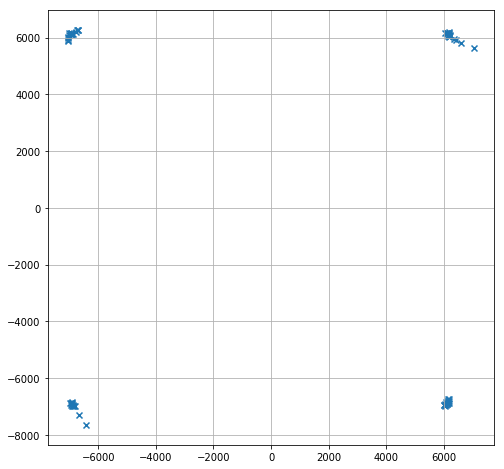

In [71]:
dumper=signaltapCsvDumper('../stp1.csv')
dumper.dumpSession(signalPattern=["ofdmsymbolsync\|aso_out0_data\[(\d+)\]"],condition="active-high",validPattern=["ofdmsymbolsync|aso_out0_valid"],outputName="ReceiverSyncOutput")
with open('./ReceiverSyncOutput.csv','r') as fp:
    csvBuffer=list(csv.reader(fp))
    data = np.array(csvBuffer[0],dtype=int)
    data = [np.binary_repr(i,width=32) for i in data]
    real = np.array([BitArray(bin=i[0:16]).int for i in data])
    imag = np.array([BitArray(bin=i[16:]).int for i in data])
    print(real.size)

    real = real[0::2]
    imag = imag[0::2]
    print(real)
    print(imag)
    outSignal = real + imag*1j
    frequencyDomain=np.fft.fft(outSignal)
    #frequencyDomain+=frequencyDomain[0]
    lengthVector=np.linspace(1,64,64)
    plt.figure(figsize=(30,15))
    plt.subplot(221)
    plt.plot(lengthVector,real,'-')
    plt.title('DAC Channel A Output in time Domain')
    plt.subplot(222)
    plt.title('DAC Channel A Output in frequency Domain')
    plt.plot(lengthVector,np.real(frequencyDomain),'-x')
    plt.subplot(223)
    plt.plot(lengthVector,imag,'-')
    plt.title('DAC Channel B Output in time Domain')
    plt.subplot(224)
    plt.plot(lengthVector,np.imag(frequencyDomain),'-x')

    plt.title('DAC Channel B Output in frequency Domain')

    fftResult  = frequencyDomain
    demodReal=np.real(fftResult)
    demodImag=np.imag(fftResult)

    plt.figure(figsize=(8,8))
    plt.grid(True,axis='both',which='major')
    plt.scatter(demodReal[1:],demodImag[1:],marker='x')

    demodOut = cs.ConstellationDeMapping(demodReal[1:],demodImag[1:])
    #Calculate BER
    receiveData=int(demodOut,2)
    sendLiteral=np.binary_repr(sendData)
    receiveLiteral =np.binary_repr(receiveData)
    BER=100.0*len([(i,j) for i,j in zip(sendLiteral[8:],receiveLiteral[8:]) if i!=j])/len(receiveLiteral)

    print(hex(int(demodOut,2)))
    print(BER)


[  113  1775   178  1018  1258  1506  1250   -64  -406  -279   372   617
 -1243  1348   181   -17   676   343   -75  -449  1069  1737   495   524
  -770   840  -670  -380  -219  -642   816   416   453   906  -390  -448
   967   -86   283  -597  -698   -88    80  1235    82   617  -359  -133
  1065  1554 -1128   718  -612 -1030 -1833  -226  1289  -154 -1164  -628
   817  -891  -374  -580]
[  121  -862  -153   672  -821   480  -726 -1070  -315  -326  -508 -1333
  1272   255  -171  -632   -60   231    15  -455  -639 -1408    30  1518
  1216    55  1127 -2176   977  -168  -419   911   139 -1213   477   196
   134  -962  1139   130   578  -482  -113  -702  -269   629    88  1448
  -869   980   204  -289  -569  2222   118    13  1490  -105    45   117
  -577  -366  1076   618]
sendData: 0xbe9b65be87e4cda361d4172b009a1500
sendData: 0x3e9b65be87e4cda361d4172b009a1500
0x3e9b65be87e4cda361d4172b009a1500
45.23809523809524


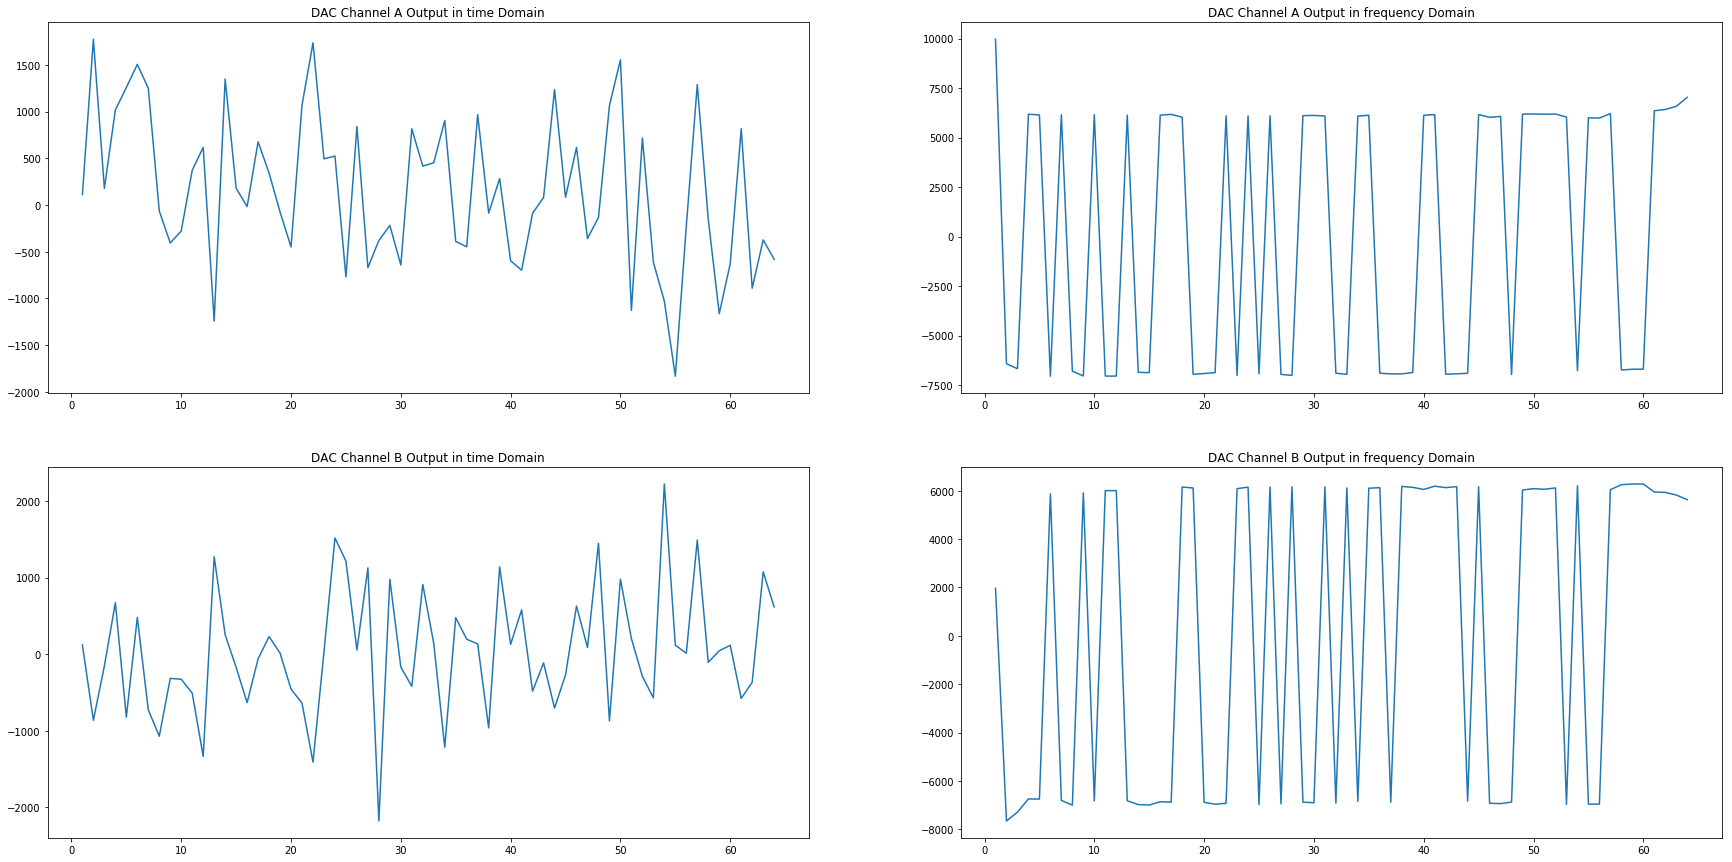

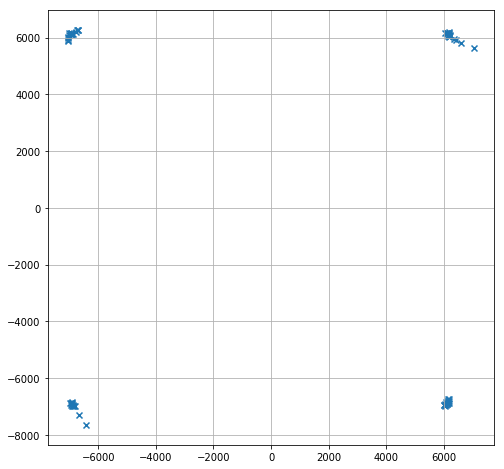

In [75]:
dumper=signaltapCsvDumper('../stp1.csv')
dumper.dumpSession(signalPattern=[".*ReceiverTopQsys_0_FFT:fft\|sink_real\[(\d+)\]",".*ReceiverTopQsys_0_FFT:fft\|sink_imag\[(\d+)\]"],condition="active-high",validPattern=["ReceiverTopQsys_0_FFT:fft|sink_valid"],outputName="RXFFTInput")
with open('./RXFFTInput.csv','r') as fp:
    csvBuffer=list(csv.reader(fp))
    data = np.array(csvBuffer,dtype=int)
    real=data[0][::2]
    imag=data[1][::2]

    print(real)
    print(imag)
    outSignal = real + imag*1j
    lengthVector=np.linspace(1,64,64)
    plt.figure(figsize=(30,15))
    plt.subplot(221)
    plt.plot(lengthVector,real,'-')
    plt.title('DAC Channel A Output in time Domain')
    plt.subplot(222)
    plt.title('DAC Channel A Output in frequency Domain')
    plt.plot(lengthVector,np.real(frequencyDomain),'-')
    plt.subplot(223)
    plt.plot(lengthVector,imag,'-')
    plt.title('DAC Channel B Output in time Domain')
    plt.subplot(224)
    plt.plot(lengthVector,np.imag(frequencyDomain),'-')

    plt.title('DAC Channel B Output in frequency Domain')

    fftResult  = frequencyDomain
    demodReal=np.real(fftResult)
    demodImag=np.imag(fftResult)

    plt.figure(figsize=(8,8))
    plt.grid(True,axis='both',which='major')
    plt.scatter(demodReal[1:],demodImag[1:],marker='x')

    demodOut = cs.ConstellationDeMapping(demodReal[1:],demodImag[1:])
    #Calculate BER
    receiveData=int(demodOut,2)
    sendLiteral=np.binary_repr(sendData)
    receiveLiteral =np.binary_repr(receiveData)
    print("sendData:",hex(sendData))
    print("sendData:",hex(receiveData))
    BER=100.0*len([(i,j) for i,j in zip(sendLiteral[8:],receiveLiteral[8:]) if i!=j])/len(receiveLiteral)

    print(hex(int(demodOut,2)))
    print(BER)


[ 624 -403 -417  387  384 -441  385 -424 -440  384 -440 -439  385 -429
 -430  384  386  376 -435 -433 -429  381 -439  382 -432  382 -434 -439
  383  382  380 -432 -435  381  384 -431 -435 -434 -429  382  386 -434
 -433 -431  385  376  380 -434  387  387  386  387  378 -424  375  375
  388 -420 -419 -417  397  402  410  440]
[ 123 -479 -456 -422 -422  367 -425 -438  368 -427  375  374 -426 -436
 -438 -428 -431  385  383 -431 -436 -433  379  383 -437  385 -433  384
 -429 -431  385 -432  382 -428  381  384 -431  386  384  380  388  382
  384 -426  386 -433 -434 -430  378  381  379  383 -435  388 -434 -435
  377  391  392  394  373  372  364  352]
0x3e9b65be87e4cda361d4172b009a1500
0x3e9b65be87e4cda361d4172b009a1500
45.23809523809524


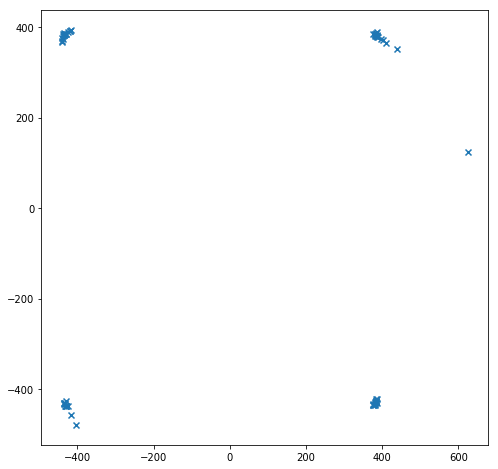

In [73]:
dumper=signaltapCsvDumper('../stp1.csv')
dumper.dumpSession(signalPattern=[".*ReceiverTopQsys_0_FFT:fft\|source_real\[(\d+)\]",".*ReceiverTopQsys_0_FFT:fft\|source_imag\[(\d+)\]"],condition="active-high",validPattern=["ReceiverTopQsys_0_FFT:fft|source_valid"],outputName="RXFFTOutput")
with open('./RXFFTOutput.csv') as fp:
    csvBuffer=list(csv.reader(fp))
    data = np.array(csvBuffer,dtype=int)
    real=data[0][::2]
    imag=data[1][::2]
    plt.figure(figsize=(8,8))
    plt.scatter(real,imag,marker='x')
    print(real)
    print(imag)


    demodOut = cs.ConstellationDeMapping(real[1:],imag[1:])
    #Calculate BER
    print(hex(int(demodOut,2)))
    receiveData=int(demodOut,2)
    sendLiteral=np.binary_repr(sendData)
    receiveLiteral =np.binary_repr(receiveData)
  

    BER=100.0*len([(i,j) for i,j in zip(sendLiteral[8:],receiveLiteral[8:]) if i!=j])/len(receiveLiteral)

    print(hex(int(demodOut,2)))
    print(BER)
